In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress
import plotly.graph_objects as pgo


In [2]:
# Downloading BTC one day, 1 min data for 20th of Aprilv
BTC = yf.download('BTC-USD', start='2023-04-20', end='2023-04-21',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [3]:
# Downloading BTC one day, 1 min data for 20th of Aprilv
ETH = yf.download('ETH-USD', start='2023-04-20', end='2023-04-21',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [4]:
BTC.drop(['Adj Close', 'Volume'], axis = 1 , inplace = True)
BTC.index = BTC.index.time
ETH.drop(['Adj Close', 'Volume'], axis = 1 , inplace = True)
ETH.index = ETH.index.time

In [5]:
# if they are the same size
print(ETH.shape, BTC.shape)
print('Are they have the same size: ', ETH.shape == BTC.shape )

(1192, 4) (1192, 4)
Are they have the same size:  True


In [6]:
BTC.head(3)

Open          High           Low         Close
00:00:00  28823.683594  28823.683594  28823.683594  28823.683594
00:01:00  28810.832031  28810.832031  28810.832031  28810.832031
00:02:00  28795.544922  28795.544922  28795.544922  28795.544922

In [7]:
ETH.tail(3)

Open         High          Low        Close
23:56:00  1944.978394  1944.978394  1944.978394  1944.978394
23:57:00  1943.326294  1943.326294  1943.326294  1943.326294
23:58:00  1943.595337  1943.595337  1943.595337  1943.595337

In [8]:
fig = pgo.Figure( data =
            [
                pgo.Candlestick(
                    x= BTC.index,
                    low = BTC['Low'],
                    high = BTC['High'],
                    open = BTC['Open'],
                    close = BTC['Close'],
                    increasing_line_color = 'green',
                    decreasing_line_color = 'red'
                )
            ])
fig.update_layout(
    title = 'BTC-USD',
    yaxis_title = 'Price(USD)',
    xaxis_title = 'Time'
)
fig.show()

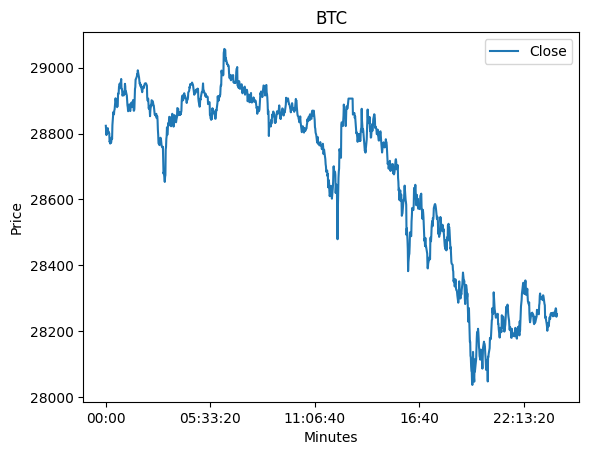

In [9]:
BTC['Close'].plot(xlabel = 'Minutes', ylabel = 'Price', legend = True, title ='BTC');

In [10]:
BTC.describe()

Open          High           Low         Close
count   1192.000000   1192.000000   1192.000000   1192.000000
mean   28671.754727  28671.754727  28671.754727  28671.754727
std      273.152645    273.152645    273.152645    273.152645
min    28037.257812  28037.257812  28037.257812  28037.257812
25%    28452.870605  28452.870605  28452.870605  28452.870605
50%    28802.840820  28802.840820  28802.840820  28802.840820
75%    28888.746582  28888.746582  28888.746582  28888.746582
max    29056.951172  29056.951172  29056.951172  29056.951172

In [11]:
fig = pgo.Figure( data =
            [
                pgo.Candlestick(
                    x= ETH.index,
                    low = ETH['Low'],
                    high = ETH['High'],
                    open = ETH['Open'],
                    close = ETH['Close'],
                    increasing_line_color = 'green',
                    decreasing_line_color = 'red'
                )
            ])
fig.update_layout(
    title = 'ETH-USD',
    yaxis_title = 'Price(USD)',
    xaxis_title = 'Date'
)
fig.show()

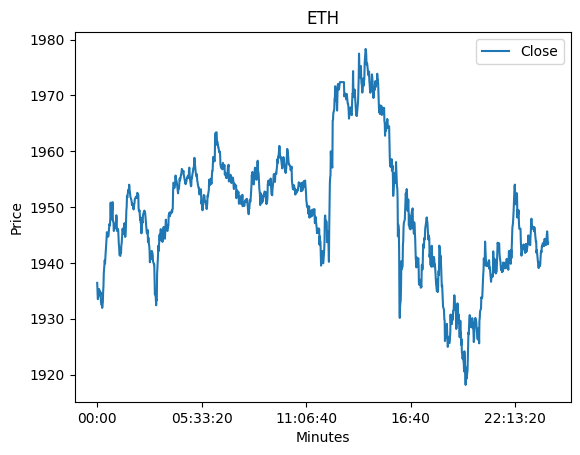

In [12]:
ETH['Close'].plot(xlabel = 'Minutes', ylabel = 'Price', legend = True, title ='ETH');

In [13]:
ETH.describe()

Open         High          Low        Close
count  1192.000000  1192.000000  1192.000000  1192.000000
mean   1949.254958  1949.254958  1949.254958  1949.254958
std      11.618782    11.618782    11.618782    11.618782
min    1918.132812  1918.132812  1918.132812  1918.132812
25%    1941.843109  1941.843109  1941.843109  1941.843109
50%    1949.493164  1949.493164  1949.493164  1949.493164
75%    1955.540375  1955.540375  1955.540375  1955.540375
max    1978.328857  1978.328857  1978.328857  1978.328857

In [14]:
S1_0 = BTC['Open'][0]
S1_0

28823.68359375

In [15]:
S2_0 = ETH['Open'][0]
S2_0

1936.41796875

In [16]:
lr1 = np.log(BTC['Close'] / BTC['Close'].shift(1))
lr2 = np.log(ETH['Close'] / ETH['Close'].shift(1))
mu_1 = lr1.mean() * 1440 #len(BTC)
mu_2 = lr2.mean() * 1440#len(ETH)
sigma_1 = lr1.std() * np.sqrt( 1440)#len(BTC))
sigma_2 = lr2.std() * np.sqrt(1440)# len(ETH))
rho = lr1.corr(lr2) # correlation coefficent
z_0 = 0.00          # co_integrate factor
gamma = 0.5         # Risk Aversion parameter in Utility Function
delta = 0.8         # parameter of co-integrate factor
T = 1               # One day
M = len(BTC)        # many times that we can trade


In [17]:
rho # correlation coefficent

0.8999326313602545

In [18]:
result = linregress(np.log(BTC['Close']), np.log(ETH['Close']))
beta =result.slope

In [19]:
print('β:',beta)

β: 0.4126914267348671


In [20]:
dt = T/M  # Time difference
S1 = np.zeros((M + 1, 1))   # np arrayes for storing S change in each step 
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))  # Number of BTC
Pi_2 = np.zeros((M + 1, 1))  # Number of ETH


In [21]:
def set_up():
    tt = np.linspace(0, 1, M + 1)
    z[0] = z_0
    S1[0] = S1_0
    S2[0] = S2_0
    sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
    eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
    rn = np.random.standard_normal(z.shape)   # setting up random variable for co-integrated factor 
    for t in range(1, M + 1):
        z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt+ sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/sigma_beta * rn[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta)* rn[t]);
        S1[t] = BTC['Close'][t-1]
        S2[t] = ETH['Close'][t-1]



In [22]:
set_up()

Text(0.5, 1.0, 'Cryptocurrencies Price')

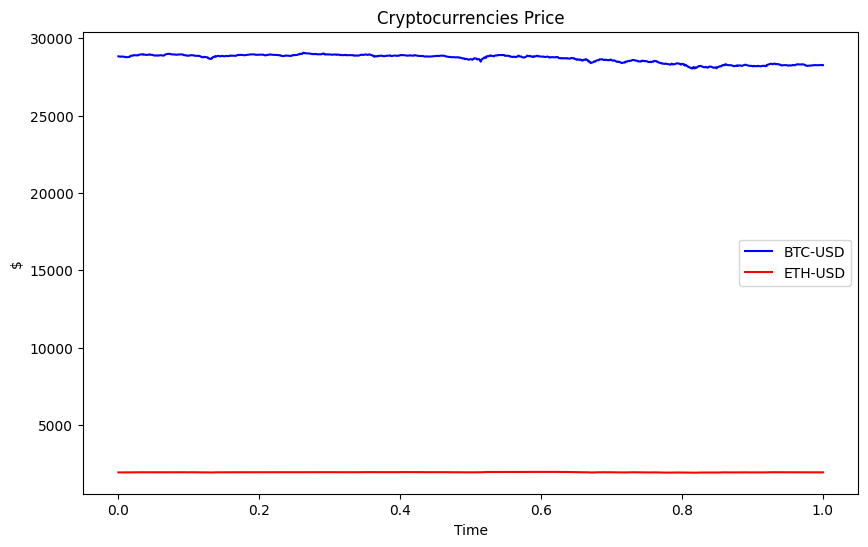

In [23]:
tt = np.linspace(0, 1, M + 1)
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='BTC-USD')
plt.plot(tt, S2, 'r', lw=1.5, label='ETH-USD')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cryptocurrencies Price')

In [24]:
from sklearn import preprocessing
S1_s =preprocessing.scale(S1)
S2_s = preprocessing.scale(S2)

Text(0.5, 1.0, 'Cryptocurrencies Price')

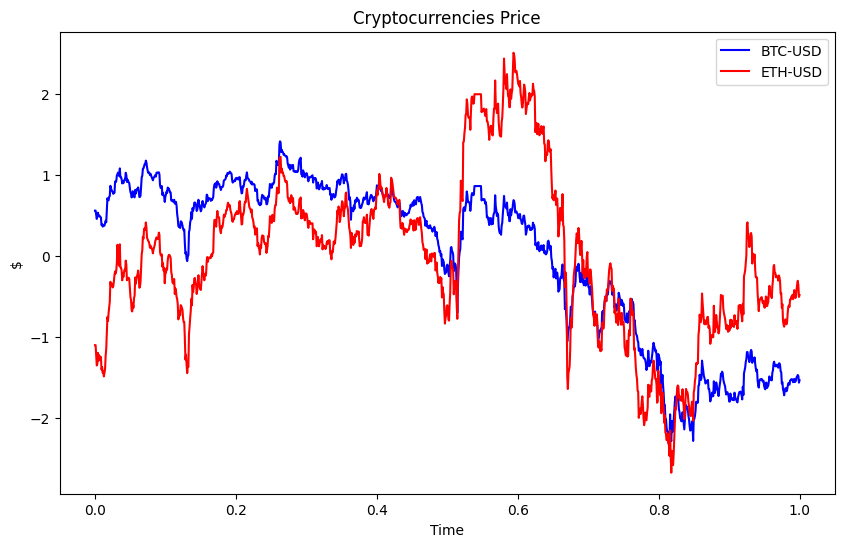

In [25]:
tt = np.linspace(0, 1, M + 1)
plt.figure(figsize=(10, 6))
plt.plot(tt, S1_s, 'b', lw=1.5, label='BTC-USD')
plt.plot(tt, S2_s, 'r', lw=1.5, label='ETH-USD')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cryptocurrencies Price')

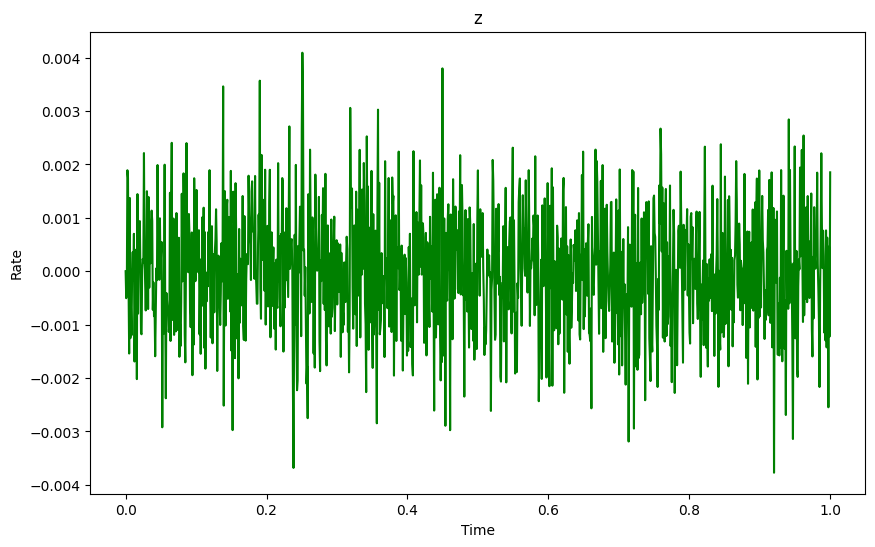

In [26]:
test = z.copy()
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z');

#### shape of above plot might be different each time beacuse of our random variable

In [27]:
test == z

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

## Trading Strategy

In [28]:
def trading_strategy():
    for t in range(1, M + 1):
        a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
        b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
        c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
        Pi_1[t] = (1 / S1[t-1]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
        Pi_2[t] = (1 / S2[t-1]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
trading_strategy()

In [29]:
## comparing starting and ending price and weights 
print('starting price for BTC:',S1_0)
print('starting price for ETH:',S2_0)
print('starting weight for BTC:',Pi_1[1][0])
print('starting weight for ETH:', Pi_2[4][0])
print(S1_0//S2_0, 'times BTC price is more than ETH price at starting point')
print(Pi_2[1][0]//Pi_1[1][0],  'times BTC weight is less than ETH weight at starting point')
##
print('ending price for BTC:',S1[-1][0])
print('ending price for ETH:',S2[-1][0])
print('ending weight for BTC:',Pi_1[-1][0])
print('ending weight for ETH:',Pi_2[5][0])
print(S1[-1][0]//S2[-1][0],  'times BTC price is more than ETH price at ending point')
print(Pi_2[-1][0]//Pi_1[-1][0],  'times BTC weight is less than ETH weight at ending point')

starting price for BTC: 28823.68359375
starting price for ETH: 1936.41796875
starting weight for BTC: -0.003493038604644825
starting weight for ETH: 0.29631440981715335
14.0 times BTC price is more than ETH price at starting point
-91.0 times BTC weight is less than ETH weight at starting point
ending price for BTC: 28252.279296875
ending price for ETH: 1943.5953369140625
ending weight for BTC: -0.017096654922690416
ending weight for ETH: 0.3143406083290049
14.0 times BTC price is more than ETH price at ending point
-13.0 times BTC weight is less than ETH weight at ending point


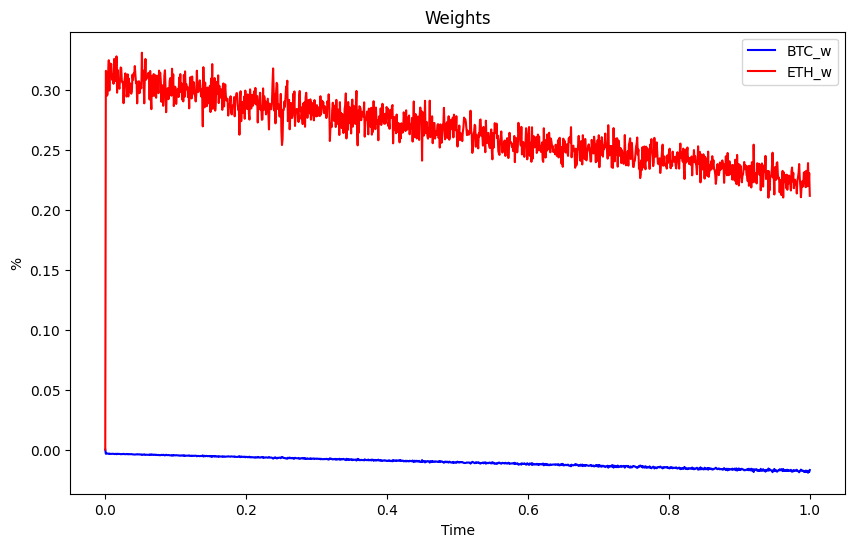

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='BTC_w')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='ETH_w')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights');

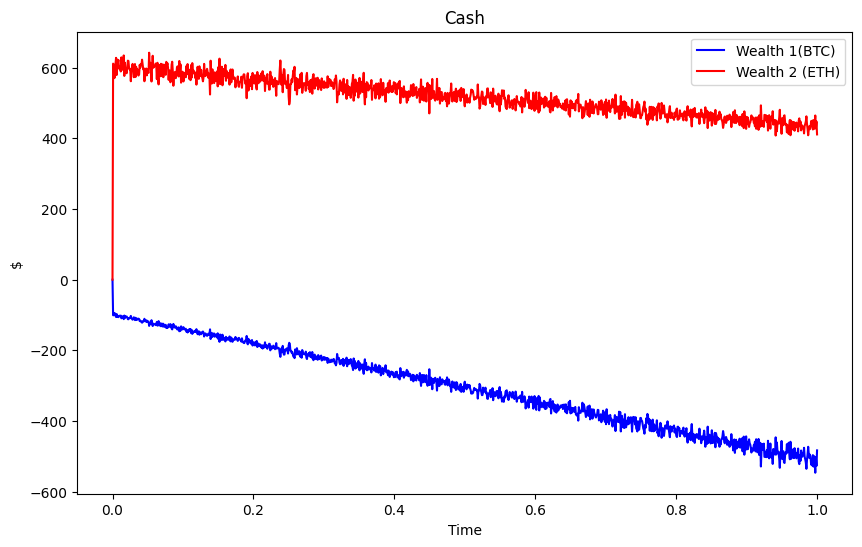

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Wealth 1(BTC)')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Wealth 2 (ETH)')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cash');

In [32]:
Wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)


Text(0.5, 1.0, 'Wealth')

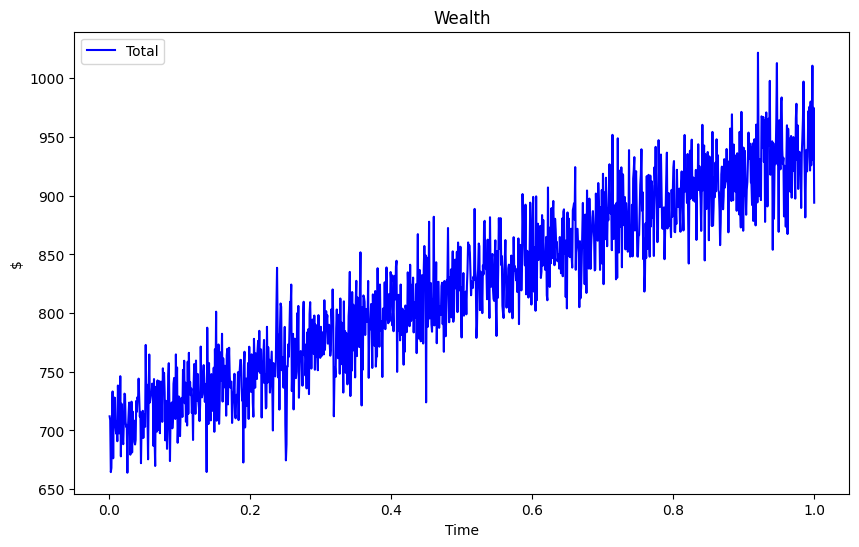

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], Wealth[1:], 'b', lw=1.5, label='Total')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

In [34]:
#Inital Wealth
print('Inital Wealth: ',Wealth[1])
#Ending Wealth
print('Ending Wealth: ',Wealth[-1])
#Return
wealth =((Wealth[-1] - Wealth[1])/Wealth[1] *100)[0]
print(f'Pair trading return is: {round(wealth,2)}%' )

Inital Wealth:  [712.04280588]
Ending Wealth:  [894.0814096]
Pair trading return is: 25.57%


## comparing result of calculated weight to constant 1 ( mean of calculated weight)

In [35]:
const1_Pi_1 = np.full_like(Pi_1, -Pi_1.mean())  # constant weight for BTC
const1_Pi_2 = np.full_like(Pi_2, Pi_2.mean())   # constant weight for ETH
const1_Wealth = abs(const1_Pi_1 * S1) + abs(const1_Pi_2 * S2)

In [36]:
print('Inital Wealth: ',const1_Wealth[1]) #Inital Wealth
print('Ending Wealth: ',const1_Wealth[-1]) #Ending Wealth
const1_Wealth_return =((const1_Wealth[-1] - const1_Wealth[1])/const1_Wealth[1] *100)[0] #Return
print(f'Pair trading return for the first constant weight is: {round(const1_Wealth_return,2)}%' )

Inital Wealth:  [821.78875357]
Ending Wealth:  [817.59363177]
Pair trading return for the first constant weight is: -0.51%


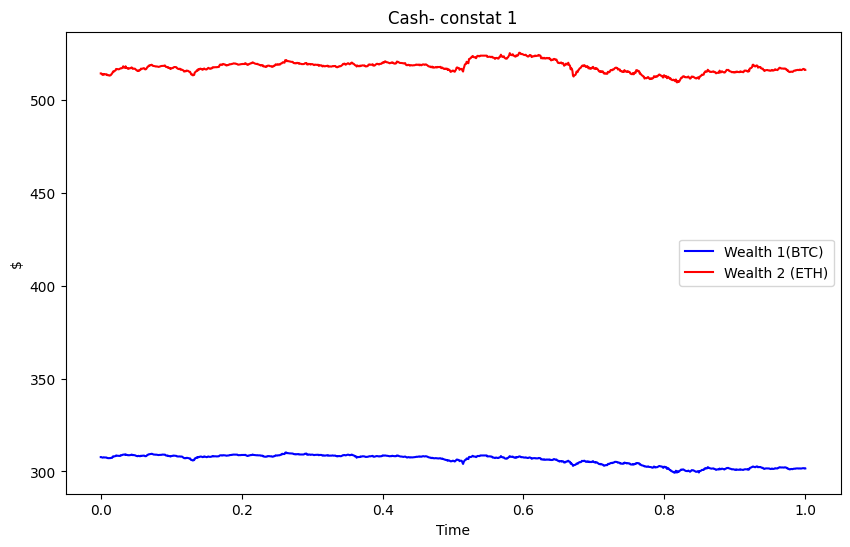

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(tt, const1_Pi_1 * S1, 'b', lw=1.5, label='Wealth 1(BTC)')
plt.plot(tt, const1_Pi_2 * S2, 'r', lw=1.5, label='Wealth 2 (ETH)')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cash- constat 1');

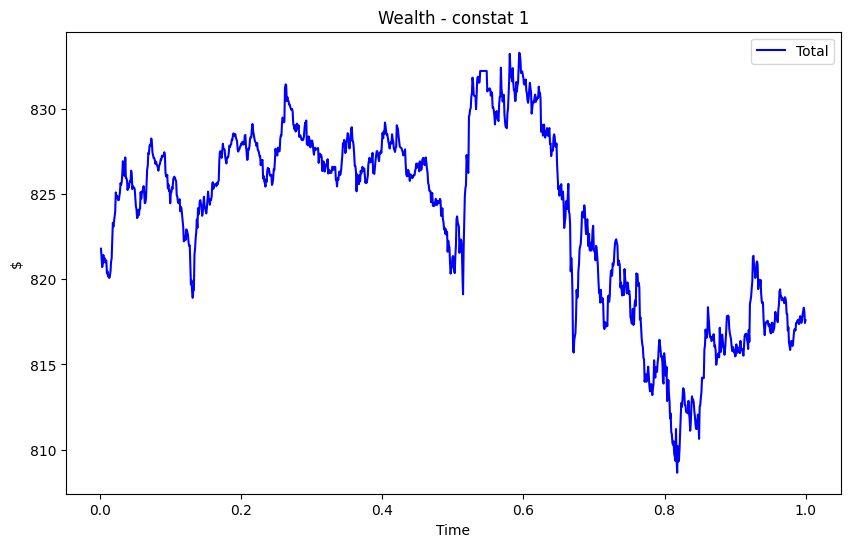

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], const1_Wealth[1:], 'b', lw=1.5, label='Total')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth - constat 1');

### comparing result of calculated weight to constant 2 ( based on relation between two prices)

In [39]:
const2_Pi_1 = np.full_like(Pi_1, -S2_0//S1_0)  # constant weight for BTC = -1
const2_Pi_2 = np.full_like(Pi_2, S1_0//S2_0)   # constant weight for EHT = 14
const2_Wealth = abs(const2_Pi_1 * S1) + abs(const2_Pi_2 * S2)

In [40]:
print('Inital Wealth: ',const2_Wealth[1]) #Inital Wealth
print('Ending Wealth: ',const2_Wealth[-1]) #Ending Wealth
const2_Wealth_return =((const2_Wealth[-1] - const2_Wealth[1])/const2_Wealth[1] *100)[0] #Return
print(f'Pair trading return for the first constant weight is: {round(const2_Wealth_return,2)}%' )

Inital Wealth:  [55933.53515625]
Ending Wealth:  [55462.61401367]
Pair trading return for the first constant weight is: -0.84%


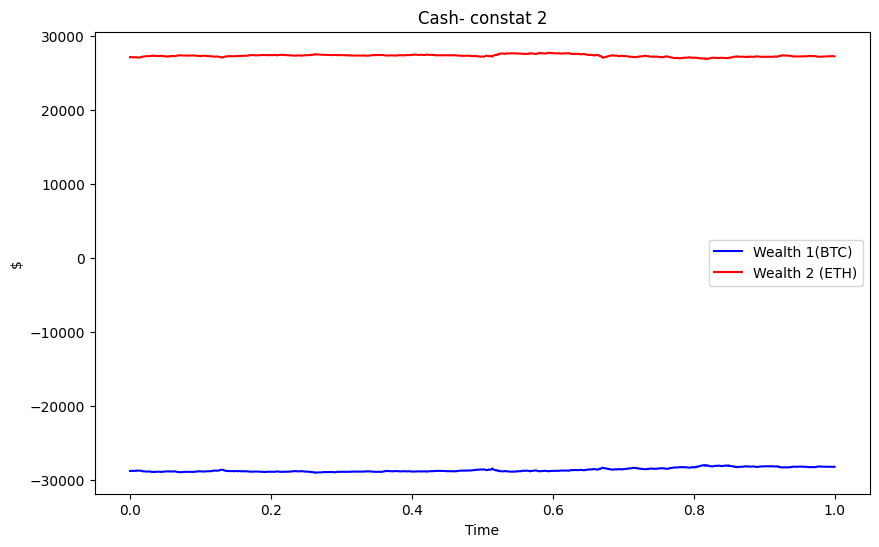

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(tt, const2_Pi_1 * S1, 'b', lw=1.5, label='Wealth 1(BTC)')
plt.plot(tt, const2_Pi_2 * S2, 'r', lw=1.5, label='Wealth 2 (ETH)')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cash- constat 2');

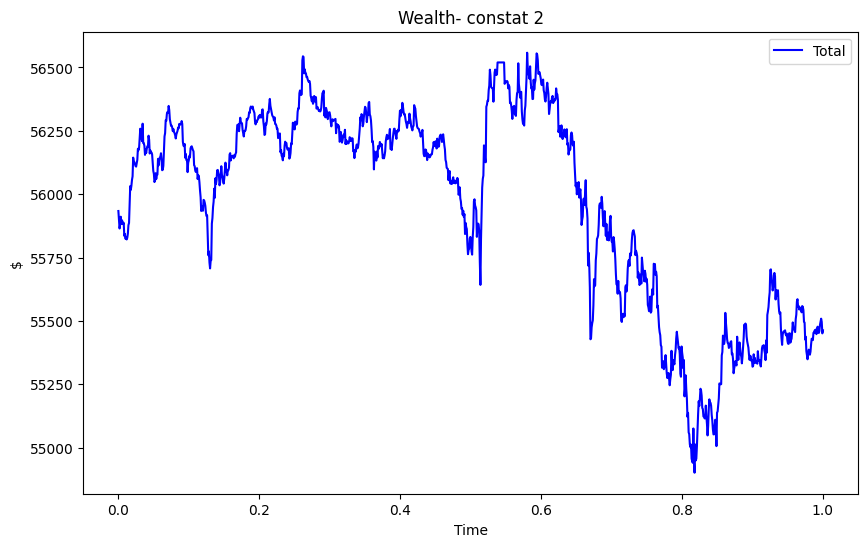

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], const2_Wealth[1:], 'b', lw=1.5, label='Total')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth- constat 2');

## comparing result of calculated weight to constant 3 ( random constant weights)
                                

In [43]:
const3_Pi_1 = np.full_like(Pi_1, -np.random.uniform(0.0, 1))  # constant weight for BTC = -1
const3_Pi_2 = np.full_like(Pi_2, +np.random.uniform(0.0, 1))   # constant weight for EHT = 14
const3_Wealth = abs(const3_Pi_1 * S1) + abs(const3_Pi_2 * S2)

In [44]:
print('Inital Wealth: ',const3_Wealth[1]) #Inital Wealth
print('Ending Wealth: ',const3_Wealth[-1]) #Ending Wealth
const3_Wealth_return =((const3_Wealth[-1] - const2_Wealth[1])/const2_Wealth[1] *100)[0] #Return
print(f'Pair trading return for the first constant weight is: {round(const3_Wealth_return,2)}%' )

Inital Wealth:  [21208.98362387]
Ending Wealth:  [20820.81441151]
Pair trading return for the first constant weight is: -62.78%


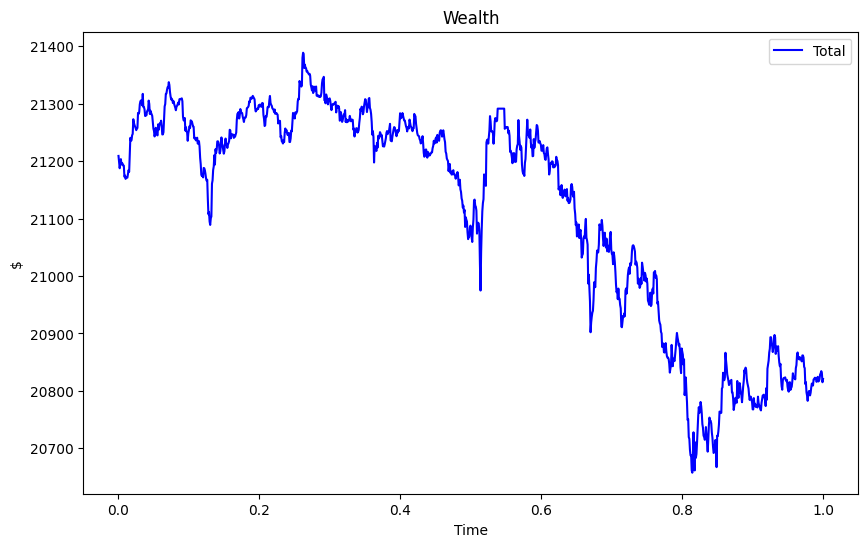

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], const3_Wealth[1:], 'b', lw=1.5, label='Total')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth');

# simulation 10000 times 

In [46]:
N = 10000
ReturnSim  = np.zeros((N, 1))
Pi_1_lst   = []
Pi_2_lst   = []
weight_lst = []
for i in range(N):
    set_up()
    trading_strategy()
    Wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)
    ReturnSim[i] = ((Wealth[-1] - Wealth[1])/Wealth[1])[0]
    weight_lst.append(Wealth)
    Pi_1_lst.append(Pi_1.copy())
    Pi_2_lst.append(Pi_2.copy())
    
         

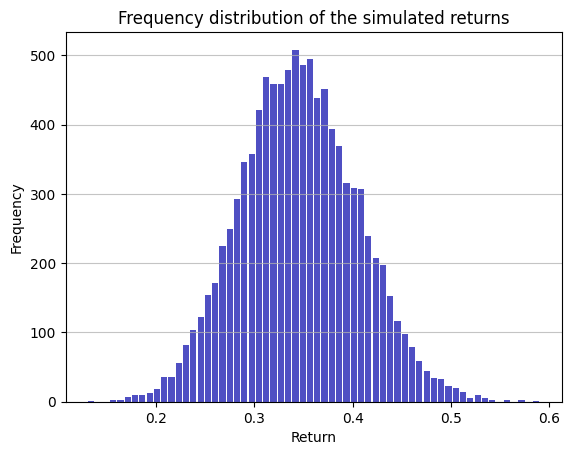

In [47]:
n, bins, patches = plt.hist(x = ReturnSim, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated returns');

## minimum return and its weights

In [48]:
min_idx = ReturnSim.argmin()
min_optimal_weight1 = Pi_1_lst[min_idx]
min_optimal_weight2 = Pi_2_lst[min_idx]
sim_Wealth = weight_lst[min_idx]
ReturnSim.min()

0.13044358973730774

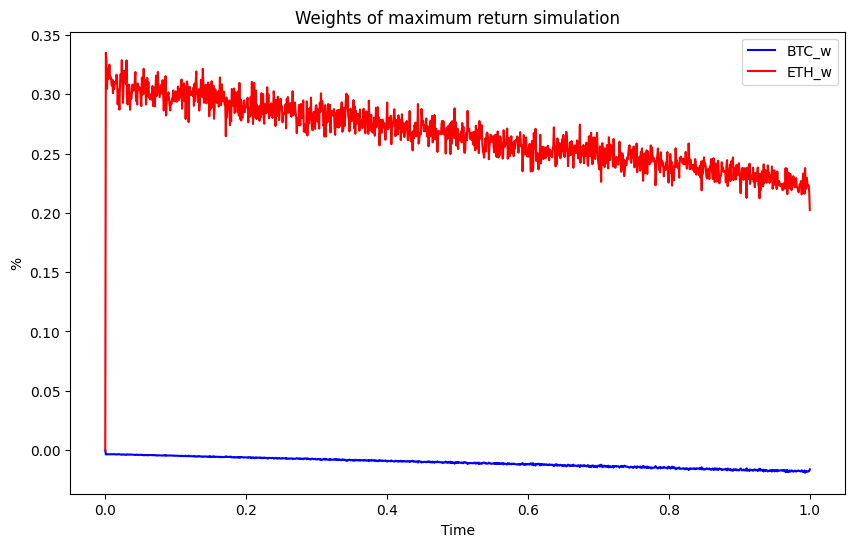

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(tt, min_optimal_weight1, 'b', lw=1.5, label='BTC_w')
plt.plot(tt, min_optimal_weight2, 'r', lw=1.5, label='ETH_w')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights of maximum return simulation');

Text(0.5, 1.0, 'Wealth')

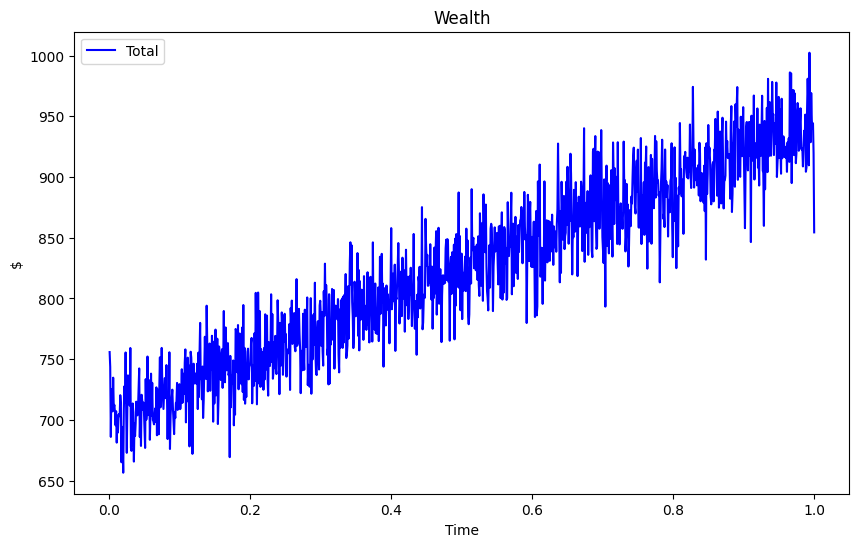

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], sim_Wealth[1:], 'b', lw=1.5, label='Total')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

In [51]:
## maximum return and its weights

In [52]:
max_idx = ReturnSim.argmax()
max_optimal_weight1 = Pi_1_lst[max_idx]
max_optimal_weight2 = Pi_2_lst[max_idx]
sim_Wealth = weight_lst[max_idx]
ReturnSim.max()

0.5902708028732025

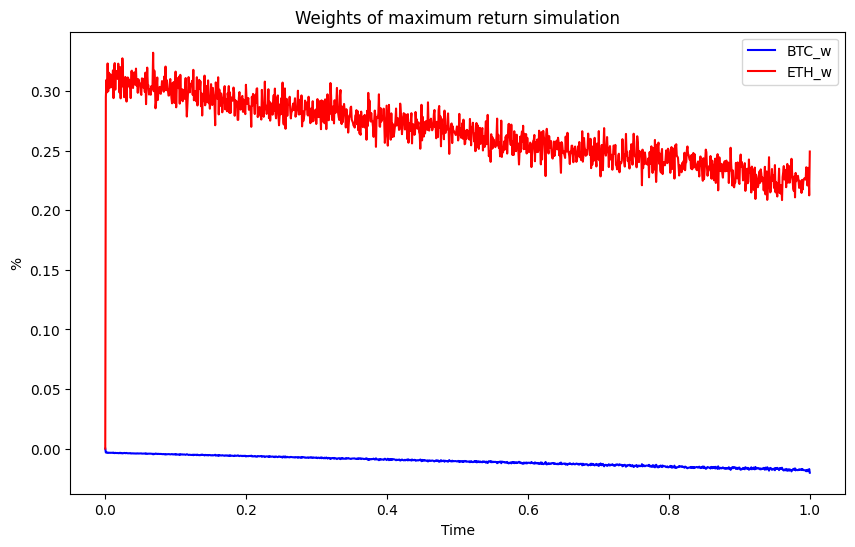

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(tt, max_optimal_weight1, 'b', lw=1.5, label='BTC_w')
plt.plot(tt, max_optimal_weight2, 'r', lw=1.5, label='ETH_w')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights of maximum return simulation');

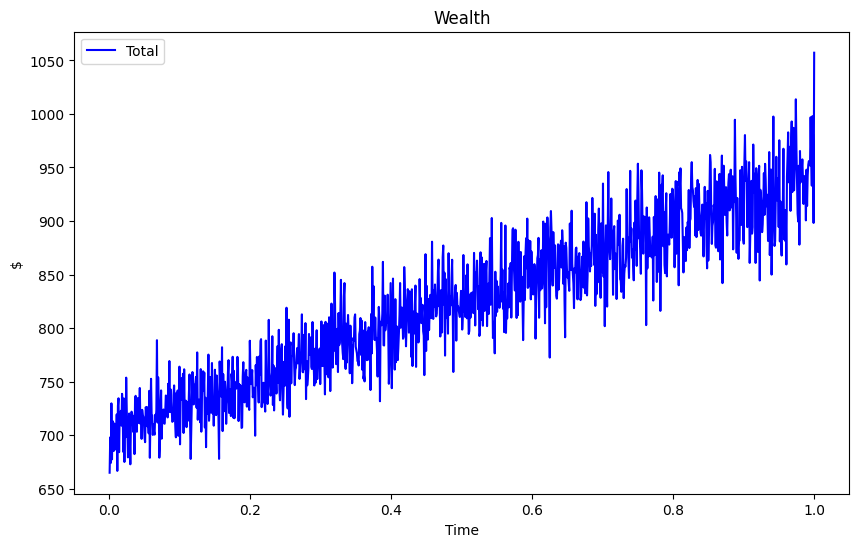

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], sim_Wealth[1:], 'b', lw=1.5, label='Total')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth');